# Credit Score

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv('credit_s.csv')

## understand the data

In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [5]:
data.isnull().sum() 

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

we dont have any null values

In [6]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

## visualization 

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Customer_ID'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>, <Axes: title={'center': 'SSN'}>],
       [<Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>],
       [<Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Ax

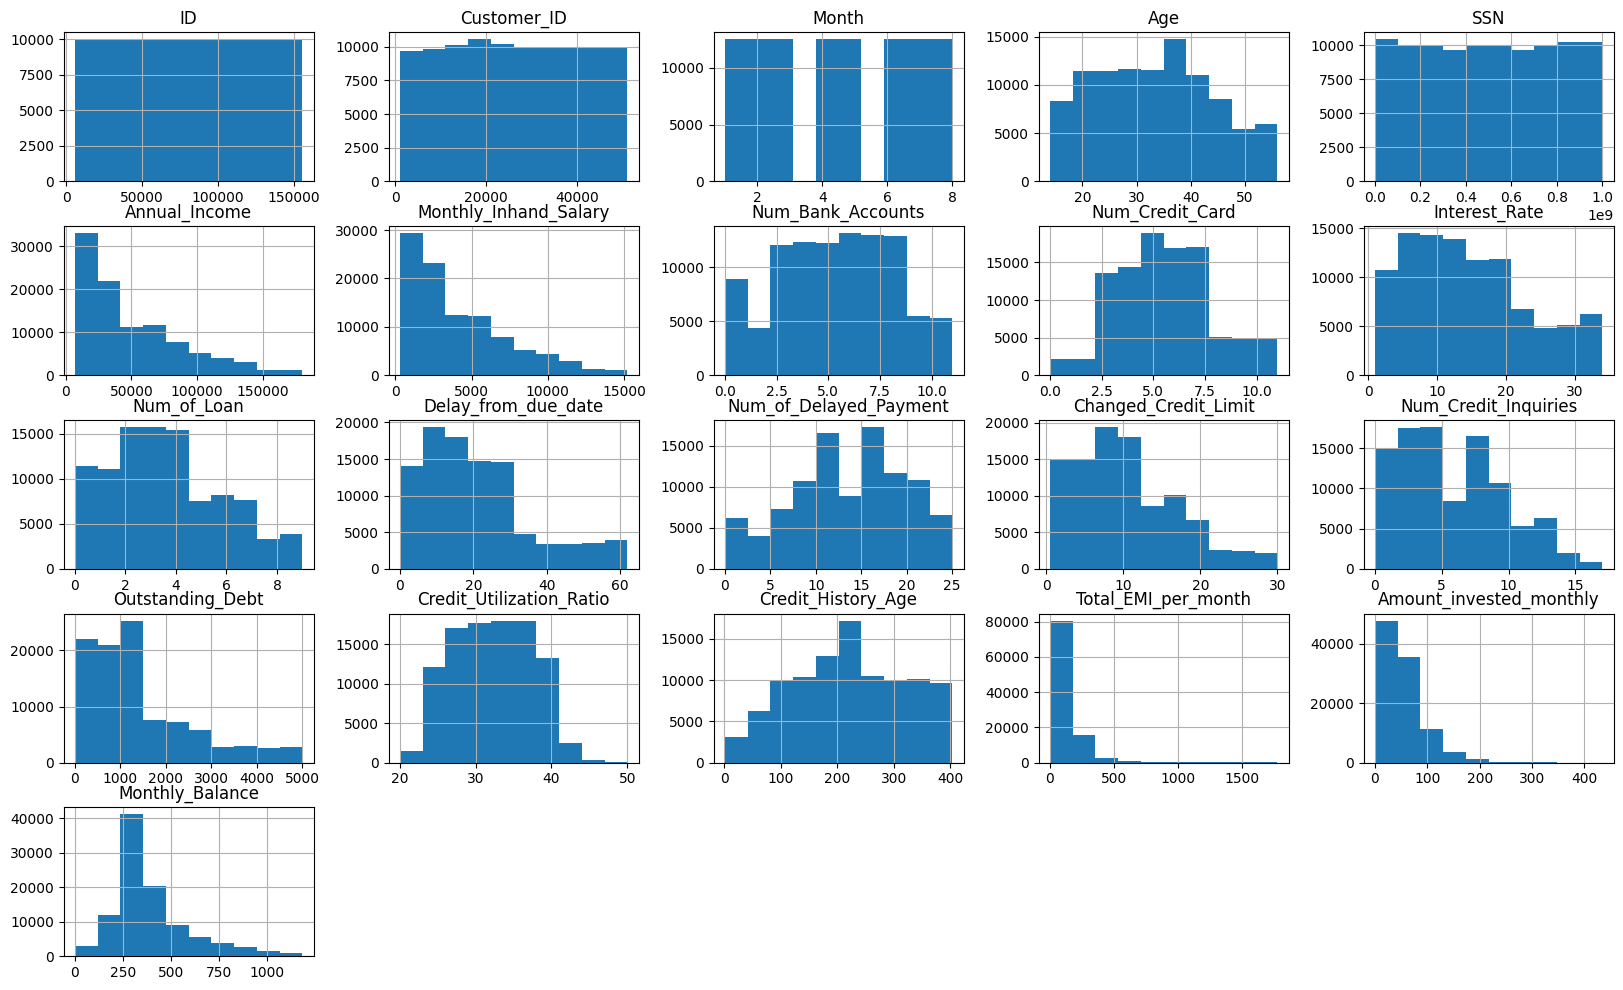

In [7]:
data.hist(figsize=(20,12))

we need to scale some of avail features \
**Age** \
**SSN** \
**Annual income** \
**Monthly inhand salary** \
**Outstanding debt** \
**Total EMI per month** \
**Amount invested monthly** 

In [8]:
data = data.drop(['Name','Occupation','Credit_Mix','Payment_Behaviour'], axis=1)

In [9]:
rscaler = RobustScaler()
columns_scale = ['Age','SSN','Annual_Income','Monthly_Inhand_Salary','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly']
for col in columns_scale:
    data[col] = pd.to_numeric(data[col], errors='coerce') 
data[columns_scale] = rscaler.fit_transform(data[columns_scale])
data.head()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,5634,3392,1,-0.555556,0.627037,-0.341716,-0.293472,3.0,4.0,3.0,...,11.27,4.0,-0.258118,26.822620,265.0,No,-0.142963,-0.546677,312.494089,Good
1,5635,3392,2,-0.555556,0.627037,-0.341716,-0.293472,3.0,4.0,3.0,...,11.27,4.0,-0.258118,31.944960,266.0,No,-0.142963,-0.546677,284.629162,Good
2,5636,3392,3,-0.555556,0.627037,-0.341716,-0.293472,3.0,4.0,3.0,...,11.27,4.0,-0.258118,28.609352,267.0,No,-0.142963,-0.546677,331.209863,Good
3,5637,3392,4,-0.555556,0.627037,-0.341716,-0.293472,3.0,4.0,3.0,...,6.27,4.0,-0.258118,31.377862,268.0,No,-0.142963,-0.546677,223.451310,Good
4,5638,3392,5,-0.555556,0.627037,-0.341716,-0.293472,3.0,4.0,3.0,...,11.27,4.0,-0.258118,24.797347,269.0,No,-0.142963,-0.546677,341.489231,Good


In [10]:
data['Annual_Income'] = np.log(np.maximum(data['Annual_Income'] , 1e-6)) + 1
data['Monthly_Inhand_Salary'] = np.log(np.maximum(data['Monthly_Inhand_Salary'] , 1e-6)) + 1
data['Total_EMI_per_month'] = np.log(np.maximum(data['Total_EMI_per_month'] , 1e-6)) + 1
data['Amount_invested_monthly'] = np.log(np.maximum(data['Amount_invested_monthly'] , 1e-6)) + 1

now data is scaled and normalized

## prepare for model

In [11]:
orde = OrdinalEncoder()
data['Credit_Score'] = orde.fit_transform(data[['Credit_Score']])
data['Credit_Score']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    2.0
99999    1.0
Name: Credit_Score, Length: 100000, dtype: float64

In [12]:
X = np.array(data[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment" 
                    , "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])
y = data['Credit_Score']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
randomfor = RandomForestClassifier()
randomfor.fit(Xtrain,ytrain)

RandomForestClassifier()

In [14]:
y_pred = randomfor.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8069


In [15]:
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain, ytrain)
y_pred_rf = rf.predict(Xtest)
print('Random Forest Classifier Performance:')
print(f'Accuracy: {accuracy_score(ytest, y_pred_rf):.4f}')
print(classification_report(ytest, y_pred_rf))

Random Forest Classifier Performance:
Accuracy: 0.8085
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      3527
         1.0       0.80      0.83      0.82      5874
         2.0       0.82      0.81      0.82     10599

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000



### Decision Tree Classifier Performance

**Accuracy**: 0.7542

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0.0   | 0.70      | 0.69   | 0.70     | 3527    |
| 1.0   | 0.75      | 0.75   | 0.75     | 5874    |
| 2.0   | 0.77      | 0.78   | 0.78     | 10599   |

**Overall Accuracy**: 0.75

**Macro Average**:
- Precision: 0.74
- Recall: 0.74
- F1-Score: 0.74

**Weighted Average**:
- Precision: 0.75
- Recall: 0.75
- F1-Score: 0.75


### K-Nearest Neighbors Performance

**Accuracy**: 0.6098

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0.0   | 0.47      | 0.48   | 0.47     | 3527    |
| 1.0   | 0.61      | 0.56   | 0.58     | 5874    |
| 2.0   | 0.66      | 0.68   | 0.67     | 10599   |

**Overall Accuracy**: 0.61

**Macro Average**:
- Precision: 0.58
- Recall: 0.57
- F1-Score: 0.58

**Weighted Average**:
- Precision: 0.61
- Recall: 0.61
- F1-Score: 0.61


### Logistic Regression Performance

**Accuracy**: 0.6082

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0.0   | 0.57      | 0.35   | 0.43     | 3527    |
| 1.0   | 0.61      | 0.47   | 0.53     | 5874    |
| 2.0   | 0.61      | 0.77   | 0.68     | 10599   |

**Overall Accuracy**: 0.61

**Macro Average**:
- Precision: 0.60
- Recall: 0.53
- F1-Score: 0.55

**Weighted Average**:
- Precision: 0.61
- Recall: 0.61
- F1-Score: 0.59


### Support Vector Machine Performance

**Accuracy**: 0.6005

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0.0   | 0.00      | 0.00   | 0.00     | 3527    |
| 1.0   | 0.64      | 0.54   | 0.58     | 5874    |
| 2.0   | 0.59      | 0.83   | 0.69     | 10599   |

**Overall Accuracy**: 0.60

**Macro Average**:
- Precision: 0.41
- Recall: 0.46
- F1-Score: 0.42

**Weighted Average**:
- Precision: 0.50
- Recall: 0.60
- F1-Score: 0.54


### XGBoost Performance

**Accuracy**: 0.7431

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0.0   | 0.70      | 0.61   | 0.65     | 3527    |
| 1.0   | 0.75      | 0.73   | 0.74     | 5874    |
| 2.0   | 0.75      | 0.79   | 0.77     | 10599   |

**Overall Accuracy**: 0.74

**Macro Average**:
- Precision: 0.73
- Recall: 0.71
- F1-Score: 0.72

**Weighted Average**:
- Precision: 0.74
- Recall: 0.74
- F1-Score: 0.74


#### As you see the Random Forest is the best so we continue with it

### Save Model 

In [19]:
print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, j, k, l]])
print("Predicted Credit Score = ", randomfor.predict(features))

Credit Score Prediction : 
Predicted Credit Score =  [2.]


In [20]:
import joblib
joblib.dump(randomfor, 'Credit_Score.pkl')

['Credit_Score.pkl']